In [3]:
import numpy as np
data = np.load("./data/gsn_img_uint8.npy")
mask = np.load("./data/gsn_msk_uint8.npy")
print(data.shape)
print(mask.shape)

(2000, 128, 128, 3)
(2000, 128, 128, 1)


In [91]:
import matplotlib.pyplot as plt



# functions to show an image
def maskshow(mask):
    img = np.zeros((mask.shape[0], mask.shape[1], 3))
    img[:] = mask
    plt.imshow(img)
    plt.show()

def imshow(img):
    plt.imshow(img)
    plt.show()

# print(data[0].shape)
# for i in range(10):
#     maskshow(mask[i])
#     imshow(data[i])

def normalize(mask):
    return mask/255



[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [1.]
  [1.]
  [1.]]

 [[0.]
  [0.]
  [0.]
  ...
  [1.]
  [1.]
  [1.]]

 [[0.]
  [0.]
  [0.]
  ...
  [1.]
  [1.]
  [1.]]]


<function rotateLeft at 0x7f01b37f63b0>


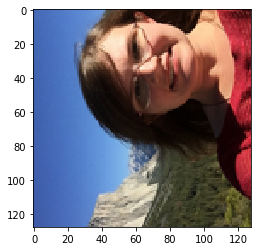

In [76]:
import random

def randomDataAug(data):
    def identity(data):
        return data

    def horizontalSymmetry(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[numRows - i  - 1][j] = data[i][j]
        return newData

    def verticalSymmetry(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[i][numCols - j - 1] = data[i][j]
        return newData

    def diagonalSymmetry1(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[numRows - i - 1][numCols - j - 1] = data[j][i]
        return newData

    def diagonalSymmetry2(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[i][j] = data[j][i]
        return newData

    def rotateRight(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[j][numRows - i - 1] = data[i][j]
        return newData

    def rotateLeft(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[numCols - j - 1][i] = data[i][j]
        return newData

    def rotateTwice(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[numCols - j - 1][numRows - i - 1] = data[j][i]
        return newData

    dataAug = [identity, horizontalSymmetry, verticalSymmetry,
               diagonalSymmetry1, diagonalSymmetry2, rotateLeft,
               rotateRight, rotateTwice]

    f = dataAug[random.randrange(0, 7, 1)]
    print(f)
    return f(data)



imshow(randomDataAug(data[0]))
# imshow(horizontalSymmetry(data[0]))
# imshow(verticalSymmetry(data[0]))
# imshow(diagonalSymmetry2(data[0]))
# imshow(diagonalSymmetry1(data[0]))
# imshow(rotateRight(data[0]))
# imshow(rotateLeft(data[0]))
# imshow(rotateTwice(data[0]))
